In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
%matplotlib inline

In [2]:
#Import geodataframe
locations = gpd.read_file('../data/geodataframes/all_locations.shp')

In [3]:
locations.head(3)

locatie  compartime locatie_co  locatie_X  locatie_Y    plt_X     plt_Y  \
0  NOORDWK20          10        E50    4103000   52203000  4103000  52203000   
1  NOORDWK10          10        E50    4180900   52180800  4180900  52180800   
2   NOORDWK2          10        E50    4242200   52154100  4242200  52154100   

                    locatie_om        comparti_1  \
0  Noordwijk 20 km uit de kust  Oppervlaktewater   
1  Noordwijk 10 km uit de kust  Oppervlaktewater   
2   Noordwijk 2 km uit de kust  Oppervlaktewater   

                        gebieds_co     X_RD      Y_RD     X_WGS     Y_WGS  \
0  Hollandse kust  (Kustzone, NCP)  72374.0  484329.0  4.174743  52.34066   
1  Hollandse kust  (Kustzone, NCP)  80995.0  479803.0  4.302219  52.30122   
2  Hollandse kust  (Kustzone, NCP)  88000.0  475160.0  4.405826  52.26039   

                    geometry  
0  POINT (4.174743 52.34066)  
1  POINT (4.302219 52.30122)  
2  POINT (4.405826 52.26039)

In [4]:
#Importeren DataFrame, fosfaat en nitraat
fosfaat = pd.read_csv('../data/pieken_fosfaat_boven_05_zonder-tijdsaspect.csv', index_col=0)
nitraat = pd.read_csv('../data/pieken_nitraat_boven_05_zonder_tijdsaspect.csv', index_col=0)

In [5]:
fosfaat

locatie  orthofosfaat
4      BEERKNMDN     -0.582070
8          BOVSS     -0.526644
10       BRIENOD     -0.651158
27        HAMMOT     -0.632163
28       HANSWGL     -0.610358
29     HARLGVHVN     -0.512780
42        LOBPTN     -0.671628
58        PUTTHK     -0.618164
79       TERSLG4     -0.506639
83  VLISSGBISSVH     -0.657973
85          VURN     -0.870846
89      WESTHVN2     -0.534484

In [6]:
nitraat

locatie   nitraat
3      ANDK -0.626557
55   NULDHK -0.529970
84  VROUWZD -0.516361
85     VURN -0.574934
91   WIELGN -0.524190

In [7]:
#Join geodataframe met fosfaat dataframe, geodataframe is 'left' zodat geodataframe bewaard blijft.
loc_fosfaat = locations.join(fosfaat, how='inner', rsuffix='_')

In [8]:
loc_fosfaat.head()

locatie  compartime locatie_co  locatie_X  locatie_Y     plt_X     plt_Y  \
4    MARSDND          10         RD   11220000   55525000  11220000  55525000   
8   WESTHVN2          10         RD   11636900   49081500  11636900  49081500   
10  ZIJKNLE2          10         RD   11398400   49351300  11398400  49351300   
27  BROEKHVN          10         RD   14626500   52215400  14720000  52050000   
28   LELSHVN          10         RD   15425000   50200000  15425000  50200000   

        locatie_om        comparti_1      gebieds_co      X_RD      Y_RD  \
4   Marsdiep noord  Oppervlaktewater  Waddenzee west  112200.0  555250.0   
8      Westhaven-2  Oppervlaktewater  Noordzeekanaal  116369.0  490815.0   
10     Zijkanaal E  Oppervlaktewater  Noordzeekanaal  113984.0  493513.0   
27    Broekerhaven  Oppervlaktewater      Markermeer  146265.0  522154.0   
28  Lelystad haven  Oppervlaktewater      Markermeer  154250.0  502000.0   

       X_WGS     Y_WGS                            geometry   locatie_  \
4   4.749934  52.98254           POINT (4.749934 52.98254)  BEERKNMDN   
8   4.819536  52.40381           POINT (4.819536 52.40381)      BOVSS   
10  4.784162  52.42788           POINT (4.784162 52.42788)    BRIENOD   
27  5.258023  52.68675  POINT (5.258023000000001 52.68675)     HAMMOT   
28  5.376159  52.50569           POINT (5.376159 52.50569)    HANSWGL   

    orthofosfaat  
4      -0.582070  
8      -0.526644  
10     -0.651158  
27     -0.632163  
28     -0.610358

In [9]:
type(loc_fosfaat)

geopandas.geodataframe.GeoDataFrame

In [10]:
#Onnodige kollomen droppen
loc_fosfaat = loc_fosfaat.drop(['locatie_co', 'locatie_X', 'locatie_Y', 'plt_X', 'plt_Y', 'X_RD', 'Y_RD', 'X_WGS', 'Y_WGS', 'locatie_'], axis=1)

In [11]:
loc_fosfaat = loc_fosfaat.round({'orthofosfaat': 2})

In [12]:
#Nieuwe kolom met locatie-waarde creeren: MARSDND: -0.58
loc_fosfaat['locatie-waarde'] = np.nan

In [13]:
loc_fosfaat['locatie-waarde'] = loc_fosfaat['locatie'].str.cat(loc_fosfaat['orthofosfaat'].astype(str), sep =': ')


In [31]:
loc_fosfaat.head()

locatie  compartime      locatie_om        comparti_1      gebieds_co  \
4    MARSDND          10  Marsdiep noord  Oppervlaktewater  Waddenzee west   
8   WESTHVN2          10     Westhaven-2  Oppervlaktewater  Noordzeekanaal   
10  ZIJKNLE2          10     Zijkanaal E  Oppervlaktewater  Noordzeekanaal   
27  BROEKHVN          10    Broekerhaven  Oppervlaktewater      Markermeer   
28   LELSHVN          10  Lelystad haven  Oppervlaktewater      Markermeer   

                              geometry  orthofosfaat   locatie-waarde  
4            POINT (4.749934 52.98254)         -0.58   MARSDND: -0.58  
8            POINT (4.819536 52.40381)         -0.53  WESTHVN2: -0.53  
10           POINT (4.784162 52.42788)         -0.65  ZIJKNLE2: -0.65  
27  POINT (5.258023000000001 52.68675)         -0.63  BROEKHVN: -0.63  
28           POINT (5.376159 52.50569)         -0.61   LELSHVN: -0.61

In [15]:
#Joinen geodataframe met nitraat 
loc_nitraat = locations.join(nitraat, how='inner', rsuffix='_')

In [16]:
loc_nitraat = loc_nitraat.drop(['locatie_co', 'locatie_X', 'locatie_Y', 'plt_X', 'plt_Y', 'X_RD', 'Y_RD', 'X_WGS', 'Y_WGS', 'locatie_'], axis=1)

In [17]:
loc_nitraat = loc_nitraat.round({'nitraat': 2})

In [18]:
type(loc_nitraat)

geopandas.geodataframe.GeoDataFrame

In [20]:
loc_nitraat['locatie-waarde'] = np.nan

In [21]:
loc_nitraat['locatie-waarde'] = loc_nitraat['locatie'].str.cat(loc_nitraat['nitraat'].astype(str), sep =': ')

In [23]:
loc_nitraat.head()

locatie  compartime                       locatie_om  \
3      BUITHVN8          10                    Buitenhaven 8   
55    ROTTMPT50          10  Rottumerplaat 50 km uit de kust   
84  SCHARDKDPPT          10           Scharendijke diepe put   
85       HARVSS          10                 Haringvlietsluis   
91    BEERKNMDN          10                Beerkanaal midden   

          comparti_1                       gebieds_co  \
3   Oppervlaktewater  Hollandse kust  (Kustzone, NCP)   
55  Oppervlaktewater        German Bight  (zeegebied)   
84  Oppervlaktewater                  Grevelingenmeer   
85  Oppervlaktewater                      Haringvliet   
91  Oppervlaktewater                     Calandkanaal   

                              geometry  nitraat      locatie-waarde  
3   POINT (4.580848 52.46828000000001)    -0.63     BUITHVN8: -0.63  
55           POINT (6.309429 53.95269)    -0.53    ROTTMPT50: -0.53  
84           POINT (3.848149 51.74288)    -0.52  SCHARDKDPPT: -0.52  
85           POINT (4.058326 51.82947)    -0.57       HARVSS: -0.57  
91           POINT (4.090393 51.97545)    -0.52    BEERKNMDN: -0.52

In [32]:
#Kaart van Nederland importeren en crs omzetten naar epsg 4326
nederland = gpd.read_file('../data/2018-Imergis-NL-landsgrens_kustlijn-shp/2018-Imergis_landsgrens_kustlijn.shp')

In [33]:
nederland = nederland.to_crs({'init' : 'epsg:4326'})

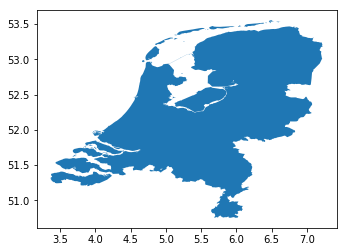

In [34]:
nederland.plot()

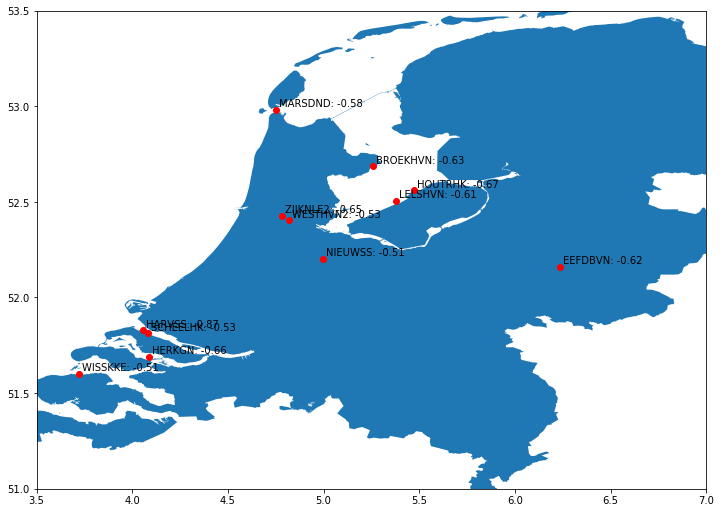

In [41]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
nederland.plot(ax=ax)
# Add locations
loc_fosfaat.plot(ax=ax, color='red', legend=True)
plt.xlim(3.5, 7.0)
plt.ylim(51, 53.5)

for x, y, label in zip(loc_fosfaat.geometry.x, loc_fosfaat.geometry.y, loc_fosfaat['locatie-waarde']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

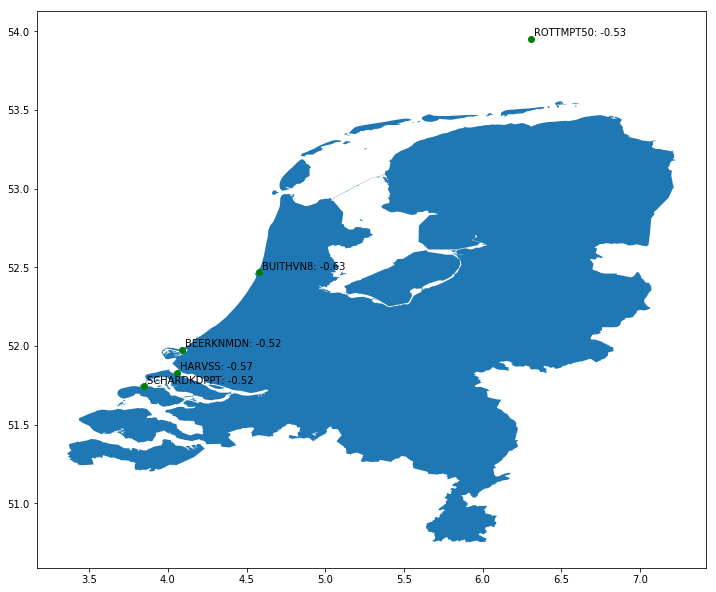

In [45]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
nederland.plot(ax=ax)
# Add locations
loc_nitraat.plot(ax=ax, color='green', legend=True)

for x, y, label in zip(loc_nitraat.geometry.x, loc_nitraat.geometry.y, loc_nitraat['locatie-waarde']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

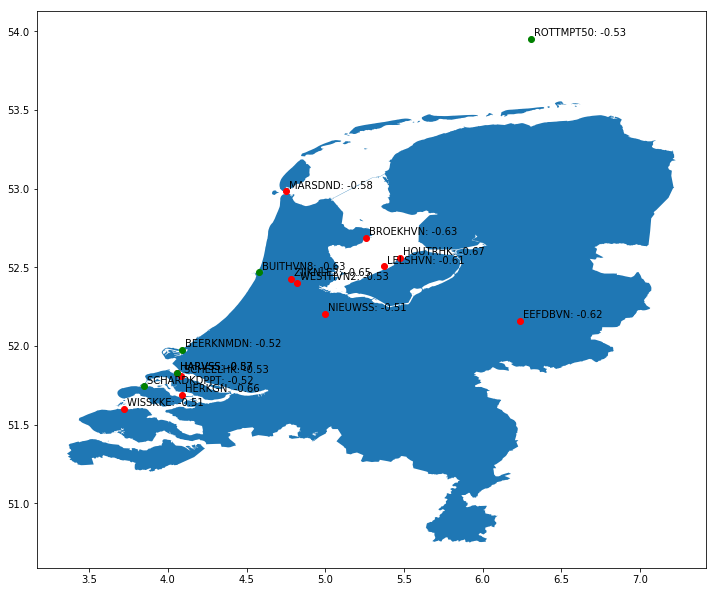

In [43]:
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
nederland.plot(ax=ax)

#Voeg fosfaat toe
loc_fosfaat.plot(ax=ax, color='red', legend=True)
#plt.xlim(3.5, 7.0)
#plt.ylim(51, 53.5)

for x, y, label in zip(loc_fosfaat.geometry.x, loc_fosfaat.geometry.y, loc_fosfaat['locatie-waarde']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

#Voeg nitraat toe
loc_nitraat.plot(ax=ax, color='green', legend=True)

for x, y, label in zip(loc_nitraat.geometry.x, loc_nitraat.geometry.y, loc_nitraat['locatie-waarde']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [44]:
fig, ax = plt.subplots(figsize=(14,14), subplot_kw={'aspect':'equal'})
loc_fosfaat.plot(color='red', ax=ax, legend=False)
loc_nitraat.plot(color='green', ax=ax, legend=False)
mplleaflet.display(fig=fig)